In [23]:
import numpy as np
import pandas as pd

from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.feature_selection import mutual_info_regression, SequentialFeatureSelector
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [24]:
ucd = pd.read_parquet('processed_ucd_2.parquet')

In [25]:
X = ucd[ucd.columns[1:]]
y = ucd.price

In [26]:
categ_set = {'bed', 'body_type', 'cabin', 'city', 'common_make', 'fuel_type', 'listing_color', 'transmission','cylinder_config'}
categ = X.columns.isin(categ_set)

In [27]:
sfs = SequentialFeatureSelector(HistGradientBoostingRegressor(), n_features_to_select='auto', tol=None, n_jobs=-1)

In [28]:
X_sfs, __, y_sfs, __ = train_test_split(X, y, train_size=0.15)
del __
X_sfs[X_sfs.columns[~categ]]

,num_cylinders,rear_ctrl,front_ctrl,fleet,frame_damaged,franchise_dealer,has_accidents,isCab,is_cpo,is_new,...,length,maximum_seating,mileage,owner_count,seller_rating,width,wheelbase,year_listed,month_listed,model_age
1878265,6,True,True,False,False,True,False,False,True,False,...,190.2,7.0,20243.0,2.0,4.866667,75.8,109.8,2020,8,1
1016609,6,True,True,False,False,True,False,False,False,True,...,196.2,7.0,7.0,1.0,4.625000,77.7,111.0,2020,8,0
87859,4,True,True,True,False,False,False,True,False,False,...,179.1,5.0,12382.0,1.0,3.833333,78.4,107.4,2020,7,1
2922307,8,True,True,True,False,False,True,False,False,False,...,184.5,5.0,173020.0,3.0,3.700000,76.0,108.3,2020,2,17
2319599,6,True,True,True,False,True,False,True,False,False,...,192.4,7.0,29339.0,1.0,4.916667,83.7,113.8,2020,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
928932,4,True,True,False,False,True,False,False,False,True,...,161.3,5.0,5.0,1.0,5.000000,81.0,99.2,2020,1,0
2671666,4,False,True,False,False,True,False,False,False,True,...,167.6,5.0,18.0,1.0,4.454545,69.9,100.6,2020,4,0
1427055,8,True,False,False,False,True,False,False,True,False,...,197.9,5.0,10338.0,1.0,4.916667,85.4,116.2,2020,8,1
11371,4,False,True,False,False,False,False,False,False,False,...,177.4,5.0,186318.0,3.0,3.647059,69.1,103.9,2020,6,12


In [29]:
sfs_non_cat = sfs.fit(X_sfs[X_sfs.columns[~categ]], y_sfs)

In [30]:
sfs_non_cat.get_feature_names_out()

array(['num_cylinders', 'front_ctrl', 'is_new', 'city_fuel_economy',
       'engine_displacement', 'fuel_tank_volume', 'height',
       'highway_fuel_economy', 'horsepower', 'length', 'maximum_seating',
       'mileage', 'width', 'wheelbase', 'model_age'], dtype=object)

In [31]:
# I think we should have rear_ctrl as well
#'num_cylinders', 'front_ctrl', 'rear_ctrl', 'is_new', 'city_fuel_economy','engine_displacement', 'fuel_tank_volume', 'height','highway_fuel_economy', 'horsepower', 'length', 'maximum_seating','mileage', 'width', 'wheelbase', 'model_age'

In [32]:
X_sfs[X_sfs.columns[categ]]

,bed,body_type,cabin,city,common_make,fuel_type,listing_color,transmission,cylinder_config
1878265,3,5,4,14,46,5,10,0,3
1016609,3,5,4,9,0,5,12,0,3
87859,3,6,4,7,31,5,13,0,1
2922307,3,5,4,17,17,5,3,0,3
2319599,3,5,4,12,10,5,13,0,3
...,...,...,...,...,...,...,...,...,...
928932,3,5,4,8,13,5,12,0,1
2671666,3,5,4,34,8,5,0,0,1
1427055,3,1,4,3,10,5,0,0,3
11371,3,6,4,32,29,5,13,0,1


In [33]:
mi = mutual_info_regression(X[X.columns[categ]], y, discrete_features=[True for _ in X.columns[categ]])
mi

array([0.00537332, 0.24952102, 0.01323632, 0.26108383, 0.49194009,
       0.0693767 , 0.05698952, 0.09559162, 0.16886406])

In [34]:
pd.Series(mi, index=X.columns[categ]).sort_values()

bed                0.005373
cabin              0.013236
listing_color      0.056990
fuel_type          0.069377
transmission       0.095592
cylinder_config    0.168864
body_type          0.249521
city               0.261084
common_make        0.491940
dtype: float64

In [ ]:
# We'll take 'common_make', 'city', 'body_type', 'cylinder_config'

In [ ]:
# 'common_make', 'city', 'body_type', 'cylinder_config',
# 'num_cylinders', 'front_ctrl', 'rear_ctrl', 'is_new',
# 'city_fuel_economy','engine_displacement', 'fuel_tank_volume',
# 'height','highway_fuel_economy', 'horsepower', 'length', 'maximum_seating',
# 'mileage', 'width', 'wheelbase', 'model_age'

In [35]:
X_best = X[[
    'common_make', 'city', 'body_type', 'cylinder_config',
    'num_cylinders', 'front_ctrl', 'rear_ctrl', 'is_new',
    'city_fuel_economy','engine_displacement', 'fuel_tank_volume',
    'height','highway_fuel_economy', 'horsepower', 'length', 'maximum_seating',
    'mileage', 'width', 'wheelbase', 'model_age']]

categ_best = X_best.columns.isin(categ_set)

In [92]:
ordinary_price = (3000 < y) & (y < 250000)
Xb_train, Xb_test, y_train, y_test = train_test_split(X_best[ordinary_price], y[ordinary_price], train_size=0.3)
Xb_train

,common_make,city,body_type,cylinder_config,num_cylinders,front_ctrl,rear_ctrl,is_new,city_fuel_economy,engine_displacement,fuel_tank_volume,height,highway_fuel_economy,horsepower,length,maximum_seating,mileage,width,wheelbase,model_age
269430,8,19,6,1,4,True,False,False,30.0,1400.0,13.7,57.4,40.0,153.0,183.7,5.0,35681.0,70.5,106.3,3
1767279,13,9,4,3,6,True,True,False,17.0,3500.0,23.0,76.9,23.0,375.0,243.7,6.0,24593.0,96.8,156.8,3
2509329,13,18,4,3,6,True,True,True,16.0,3500.0,26.0,77.2,22.0,375.0,231.9,5.0,11.0,96.8,145.0,0
2019571,13,26,5,1,3,True,False,True,27.0,1500.0,14.7,68.6,33.0,180.0,180.5,5.0,6.0,85.6,106.7,-1
2735528,46,23,6,1,4,True,False,True,31.0,2000.0,13.2,56.5,40.0,169.0,182.5,5.0,2.0,70.1,106.3,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
813885,8,9,6,3,6,True,False,True,19.0,3600.0,18.5,58.9,28.0,305.0,201.3,5.0,1.0,84.3,111.7,0
1218401,16,3,5,3,6,True,False,True,20.0,3500.0,19.5,70.6,27.0,280.0,196.5,8.0,0.0,78.6,111.0,-1
1021311,18,8,5,1,4,True,False,True,28.0,1600.0,13.2,61.6,32.0,175.0,164.0,5.0,5.0,70.9,102.4,0
1608926,13,31,4,3,8,True,True,True,16.0,5000.0,26.0,77.2,22.0,395.0,231.9,6.0,0.0,96.8,145.0,0


In [114]:
gscv = GridSearchCV(
    estimator=HistGradientBoostingRegressor(), n_jobs=-1, verbose=1,
    scoring='neg_mean_absolute_percentage_error',
    param_grid=dict(
        categorical_features=[categ_best], early_stopping=[False],
        max_iter=[300, 400, 500], max_leaf_nodes=[300, 400, 500],
        learning_rate=[0.8, 0.1], min_samples_leaf=[10, 20, 30]
)).fit(Xb_train, y_train)
gscv.best_params_

Fitting 5 folds for each of 54 candidates, totalling 270 fits


{'categorical_features': array([ True,  True,  True,  True, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False]),
 'early_stopping': False,
 'learning_rate': 0.1,
 'max_iter': 500,
 'max_leaf_nodes': 500,
 'min_samples_leaf': 20}

In [97]:
gscv.score(Xb_test, y_test)

-0.08433456637206595

In [100]:
gscv.best_estimator_.score(Xb_test, y_test)

0.9490348858427983

In [89]:
print('MAE:', mean_absolute_error(y_test, gscv.predict(Xb_test)))
print('MPE:', mean_absolute_percentage_error(y_test, gscv.predict(Xb_test)))

MAE: 2378.625882808522
MPE: 0.08689082280140187


In [115]:
hgbr = HistGradientBoostingRegressor(categorical_features=categ_best, early_stopping=False, max_iter=1000, max_leaf_nodes=300, learning_rate=0.1)

In [116]:
hgbr.fit(Xb_train, y_train)
hgbr.score(Xb_test, y_test)

0.949216729672865

In [117]:
print('MAE:', mean_absolute_error(y_test, hgbr.predict(Xb_test)))
print('MPE:', mean_absolute_percentage_error(y_test, hgbr.predict(Xb_test)))

MAE: 2308.3071062558947
MPE: 0.08396877839498405


In [118]:
mean_absolute_percentage_error(y_train, hgbr.predict(Xb_train))

0.07225350640137389

In [143]:
mean_absolute_error(y_train, hgbr.predict(Xb_train))

1954.9080111198168

In [119]:
hgbr.score(Xb_train, y_train)

0.970369133746754

In [120]:
import pickle
with open('hgbr_model.pickle', 'wb') as f:
    pickle.dump(hgbr, f)

In [122]:
import matplotlib.pyplot as plt

/tmp/ipykernel_428767/3204750749.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.scatter(y_test[:5000], hgbr.predict(Xb_test[:5000]), s=4)


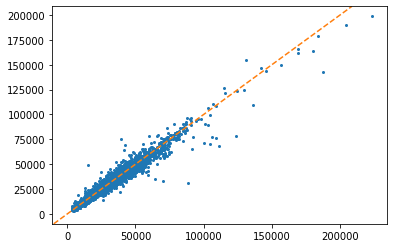

In [140]:
plt.scatter(y_test[:5000], hgbr.predict(Xb_test[:5000]), s=4)
plt.axline((0,0), slope=1, c='C1', ls='--')
plt.savefig('hgbr_plot.png', dpi=200, bbox_inches='tight')

In [141]:
len(ucd.columns)

41

In [142]:
X_best[ordinary_price]

,common_make,city,body_type,cylinder_config,num_cylinders,front_ctrl,rear_ctrl,is_new,city_fuel_economy,engine_displacement,fuel_tank_volume,height,highway_fuel_economy,horsepower,length,maximum_seating,mileage,width,wheelbase,model_age
0,21,28,5,1,4,True,False,True,21.0,1300.0,12.7,66.5,28.0,177.0,166.6,5.0,7.0,79.6,101.2,0
1,24,28,5,1,4,True,True,True,21.0,2000.0,17.7,68.0,28.0,246.0,181.0,7.0,8.0,85.6,107.9,0
2,43,28,6,0,4,True,True,False,17.0,2500.0,15.9,58.1,23.0,305.0,180.9,5.0,10000.0,78.9,104.3,1
3,24,28,5,3,6,True,True,True,21.0,3000.0,23.5,73.0,28.0,340.0,195.1,7.0,11.0,87.4,115.0,0
4,24,28,5,1,4,True,True,True,21.0,2000.0,17.7,68.0,28.0,246.0,181.0,7.0,7.0,85.6,107.9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3000035,8,33,5,1,4,True,False,False,26.0,1500.0,14.9,65.4,32.0,170.0,183.1,5.0,41897.0,72.6,107.3,2
3000036,8,33,5,3,6,True,False,True,18.0,3600.0,19.4,70.7,27.0,310.0,204.3,8.0,5.0,78.6,120.9,0
3000037,13,33,6,1,4,True,False,False,26.0,2000.0,16.5,58.2,36.0,240.0,191.7,5.0,57992.0,83.5,112.2,4
3000038,20,33,6,1,4,True,True,False,30.0,2000.0,14.8,55.7,40.0,180.0,183.9,5.0,27857.0,81.7,111.6,3


In [144]:
hgbr_untuned = HistGradientBoostingRegressor(categorical_features=categ_best)

In [145]:
hgbr_untuned.fit(Xb_train, y_train)
hgbr_untuned.score(Xb_test, y_test)

0.926255546570045

In [146]:
print('MAE:', mean_absolute_error(y_test, hgbr_untuned.predict(Xb_test)))
print('MPE:', mean_absolute_percentage_error(y_test, hgbr_untuned.predict(Xb_test)))

MAE: 2981.0222406936805
MPE: 0.11082254246180175
